<a href="https://colab.research.google.com/github/umarovj/Fantastic_4/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Initial imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime


In [2]:
url = 'https://raw.githubusercontent.com/umarovj/Fantastic_4/main/kc_house_data.csv'
house_df = pd.read_csv(url)
house_df.head(5)
# Dataset is now stored in a Pandas Dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# house_df = pd.read_csv('/kc_house_data.csv')
# house_df.head(5)

In [4]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_df.shape

(21613, 21)

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
# Load the .csv dataset

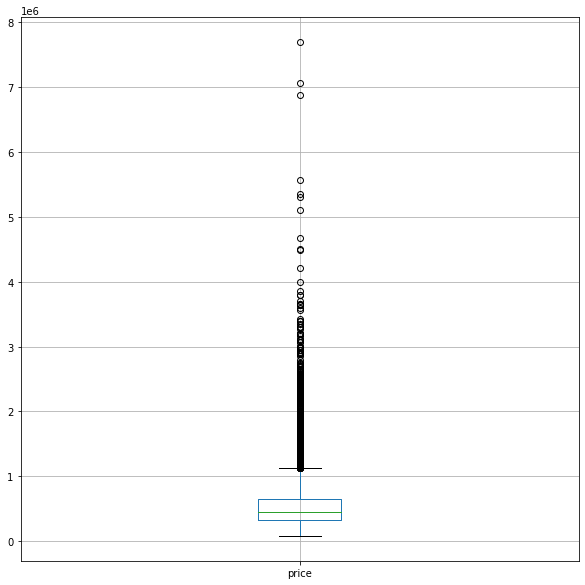

In [9]:
#boxplot of price (central dataset)
house_df.boxplot(['price'], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc69d5dc90>,
      dtype=object)

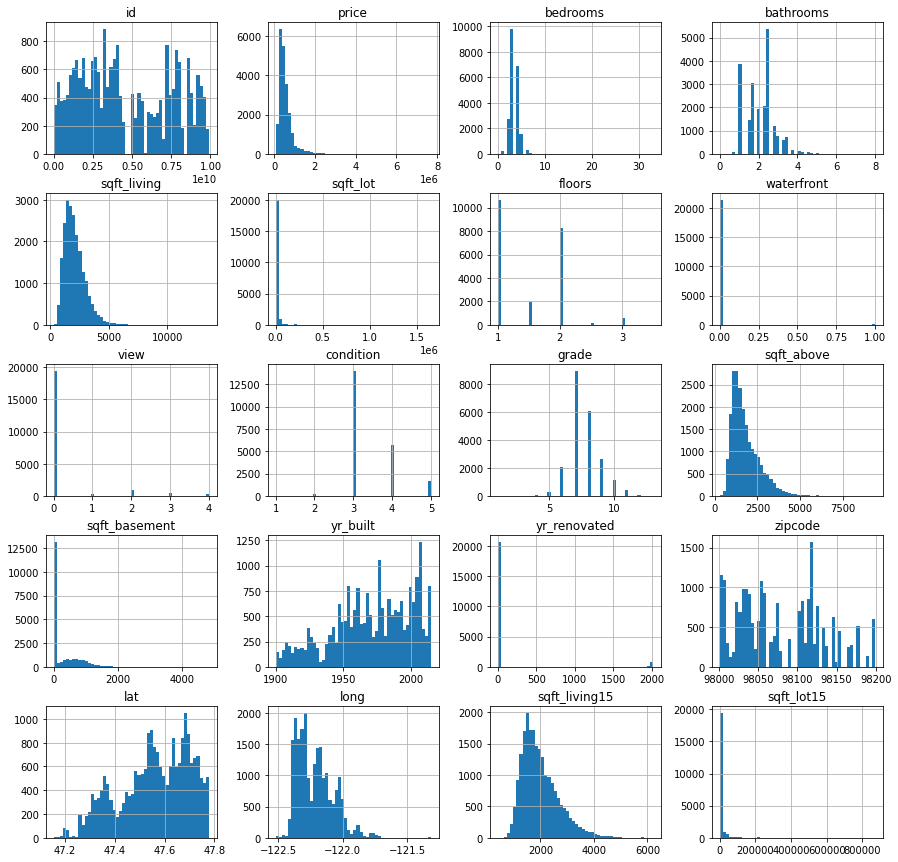

In [10]:
#histograms of our data
house_df.hist(bins=50, figsize=(15, 15))

In [11]:
# Remove six columns name is 'waterfront', 'view', 'lat', 'long', 'sqft_living15' and 'sqft_lot15'

house_df = house_df.drop(labels=['id', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ], axis = 1)
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,0,98103
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,0,98146
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,0,98144
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,0,98027


In [12]:
#date time conversion
house_df['date'] = pd.to_datetime(house_df['date'])

house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,0,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,0,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,0,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,0,98103
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,0,98146
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,0,98144
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,0,98027


In [13]:
#Replace all 0 in "yr_renovated" with NaN
house_df["yr_renovated"] = house_df["yr_renovated"].astype(int).replace(0, np.nan)
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,NaN,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991.0,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,NaN,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,NaN,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,NaN,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,NaN,98103
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,NaN,98146
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,NaN,98144
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,NaN,98027


In [14]:
house_df.count()

date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
condition        21613
grade            21613
sqft_above       21611
sqft_basement    21613
yr_built         21613
yr_renovated       914
zipcode          21613
dtype: int64

In [15]:
# Import additional dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [16]:
# Set X and Y variables
X= house_df.drop(['price','date','yr_renovated'], axis=1).values
y= house_df['price'].values

In [28]:
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,NaN,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,1991.0,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,NaN,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,NaN,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,NaN,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,NaN,98103
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,NaN,98146
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,NaN,98144
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,NaN,98027


In [17]:
X

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 0.0000e+00, 1.9550e+03,
        9.8178e+04],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 4.0000e+02, 1.9510e+03,
        9.8125e+04],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 0.0000e+00, 1.9330e+03,
        9.8028e+04],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 0.0000e+00, 2.0090e+03,
        9.8144e+04],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 0.0000e+00, 2.0040e+03,
        9.8027e+04],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 0.0000e+00, 2.0080e+03,
        9.8144e+04]])

In [18]:
# Set train, test, split parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Set variable for MinMaxScaler
scaler= MinMaxScaler()

In [20]:
X_train= scaler.fit_transform(X_train)

In [21]:
X_test= scaler.transform(X_test)

In [22]:
X_train.shape

(15129, 12)

In [27]:
X_train

array([[0.27272727, 0.3125    , 0.12301887, ..., 0.        , 0.74782609,
        0.16666667],
       [0.36363636, 0.3125    , 0.17584906, ..., 0.        , 0.79130435,
        0.28787879],
       [0.27272727, 0.3125    , 0.09811321, ..., 0.        , 0.79130435,
        0.61111111],
       ...,
       [0.27272727, 0.28125   , 0.11245283, ..., 0.        , 0.75652174,
        0.18686869],
       [0.18181818, 0.125     , 0.06490566, ..., 0.02421308, 0.20869565,
        0.57575758],
       [0.27272727, 0.125     , 0.08754717, ..., 0.07263923, 0.2       ,
        0.63131313]])

In [25]:
# Setup Keras model
model = Sequential()

model.add(Dense(15, activation= 'sigmoid'))
model.add(Dense(10, activation= 'relu'))
model.add(Dense(5, activation= 'relu'))
model.add(Dense(2, activation= 'relu'))

model.add(Dense(1))

model.compile(optimizer= 'adam',loss= 'mse')

In [26]:
# Fit model
# model.fit(x= X_train, y= y_train, validation_data= (X_test, y_test), batch_size= 128,epochs=100)
model.fit(x= X_train, y= y_train, epochs=100)

Epoch 1/100
473/473 [==============================] - 2s 2ms/step - loss: nan
Epoch 2/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 4/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/100
473/473 [==============================] - 1s 2ms/step - loss: nan
Epoch 11/100
100/473 [=====>........................] - ETA: 0s - loss: nan

KeyboardInterrupt: ignored

In [ ]:
# Check losses in model
losses = pd.DataFrame(model.history.history)
losses

In [ ]:
# Plot losses
losses.plot()

In [ ]:
# Set Prediction variable
prediction = model.predict(X_test)

In [ ]:
# Mean absolute error testing
mean_absolute_error(y_test, prediction)

In [ ]:
# Mean square testing
mean_squared_error(y_test, prediction)

In [ ]:
# Explained variance score
explained_variance_score(y_test, prediction)

In [ ]:
# Summary statistics
house_price['price'].describe()

In [ ]:
# Plot test data
plt.figure(figsize=(15,8))
plt.scatter(y_test, prediction)
plt.plot(y_test,y_test,'r')

In [ ]:
# Predict the price of a certain house in our data
predict_price= hsp.drop(['price', 'date'], axis=1).iloc[0]
predict_price

In [ ]:
predict_price = scaler.transform(predict_price.values.reshape(-1,20))

In [ ]:
model.predict(predict_price)

In [ ]:
# Compare predicted price against actual price
hsp.head(1)